In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from tabulate import tabulate
from sklearn import metrics

In [49]:
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_excel('Lab-CSE1015-Data_Regression.xlsx')

## Exploring Data

In [51]:
df.head(10)

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1
0,1.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.023
1,2.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.008
2,3.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.014
3,4.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.011
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.007
6,7.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.027
7,8.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.029
8,9.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.015
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.describe

<bound method NDFrame.describe of     Sample No    P1      P2      P3        P4    P5      P6      P7        P8  \
0         1.0  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
1         2.0  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
2         3.0  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
3         4.0  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
4         NaN   NaN     NaN     NaN       NaN   NaN     NaN     NaN       NaN   
..        ...   ...     ...     ...       ...   ...     ...     ...       ...   
94        NaN   NaN     NaN     NaN       NaN   NaN     NaN     NaN       NaN   
95       96.0  0.01  0.0529  0.9350  0.000539  0.01  0.0529  0.9350  0.000539   
96       97.0  0.01  0.0529  0.9350  0.000539  0.01  0.0575  0.9470  0.000694   
97       98.0  0.01  0.0529  0.9350  0.000539  0.01  0.0575  0.9470  0.000694   
98       99.0  0.01  0.0529  0.9350  0.000539  0.01  0.0575  0.9470  0.0006

<AxesSubplot:>

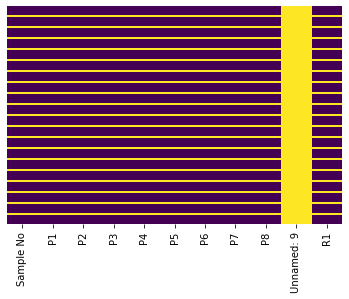

In [53]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [54]:
df.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'Unnamed: 9', 'R1'],
      dtype='object')

## Preprocessing 

In [55]:
df = df.drop(columns=['Unnamed: 9'])

In [56]:
df.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'R1'], dtype='object')

<AxesSubplot:>

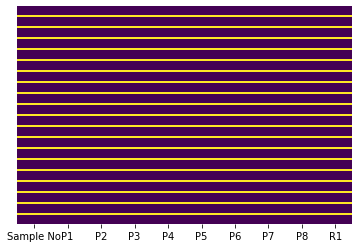

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [58]:
df.dropna(inplace=True)
df

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,R1
0,1.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.023
1,2.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.008
2,3.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.014
3,4.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.011
5,6.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.007
...,...,...,...,...,...,...,...,...,...,...
93,94.0,0.01,0.0529,0.9350,0.000539,0.01,0.0529,0.9350,0.000539,0.020
95,96.0,0.01,0.0529,0.9350,0.000539,0.01,0.0529,0.9350,0.000539,0.002
96,97.0,0.01,0.0529,0.9350,0.000539,0.01,0.0575,0.9470,0.000694,0.013
97,98.0,0.01,0.0529,0.9350,0.000539,0.01,0.0575,0.9470,0.000694,0.018


<AxesSubplot:>

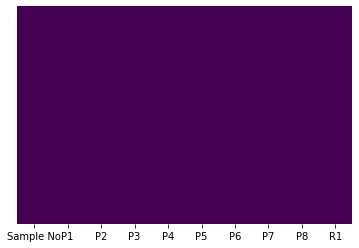

In [59]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Splitting data 

In [60]:
from sklearn.model_selection import train_test_split
train, test, = train_test_split(df, test_size=0.3)


Normalisation using MinMaxScaler from sklearn 

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = train.columns
temp = scaler.fit_transform(train)
train = pd.DataFrame(train,columns=cols)

In [62]:
train.head()

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,R1
77,78.0,0.01,0.0529,0.9350,0.000539,0.01,0.0483,0.8728,0.000435,0.026
17,18.0,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,0.008
47,48.0,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,0.012
25,26.0,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,0.018
35,36.0,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,0.003


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 77 to 0
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample No  56 non-null     float64
 1   P1         56 non-null     float64
 2   P2         56 non-null     float64
 3   P3         56 non-null     float64
 4   P4         56 non-null     float64
 5   P5         56 non-null     float64
 6   P6         56 non-null     float64
 7   P7         56 non-null     float64
 8   P8         56 non-null     float64
 9   R1         56 non-null     float64
dtypes: float64(10)
memory usage: 4.8 KB


In [64]:
scaler = MinMaxScaler()
cols = test.columns
temp = scaler.fit_transform(test)
test = pd.DataFrame(test,columns=cols)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 67 to 61
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample No  24 non-null     float64
 1   P1         24 non-null     float64
 2   P2         24 non-null     float64
 3   P3         24 non-null     float64
 4   P4         24 non-null     float64
 5   P5         24 non-null     float64
 6   P6         24 non-null     float64
 7   P7         24 non-null     float64
 8   P8         24 non-null     float64
 9   R1         24 non-null     float64
dtypes: float64(10)
memory usage: 2.1 KB


<AxesSubplot:>

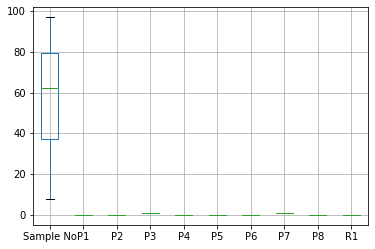

In [66]:
test.boxplot()

## Correlation

In [67]:
correlation = df.corr()
correlation['R1']

Sample No   -0.094219
P1                NaN
P2          -0.152310
P3          -0.152310
P4          -0.152310
P5                NaN
P6           0.142548
P7           0.044616
P8           0.122480
R1           1.000000
Name: R1, dtype: float64

<AxesSubplot:>

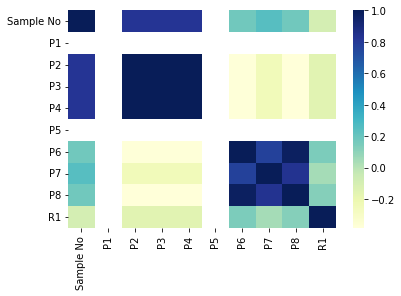

In [68]:
sns.heatmap(correlation, cmap='YlGnBu')

Factors chosen: P2,P3,P4 (Negative correlation), P6,P8 (positive correlation)

In [69]:
from sklearn.linear_model import LinearRegression
x = train[['P2','P3','P4','P6','P8']]
y = train['R1']

In [70]:
x.head()

,P2,P3,P4,P6,P8
77,0.0529,0.9350,0.000539,0.0483,0.000435
17,0.0483,0.8728,0.000435,0.0529,0.000539
47,0.0483,0.8728,0.000435,0.0575,0.000694
25,0.0483,0.8728,0.000435,0.0529,0.000539
35,0.0483,0.8728,0.000435,0.0575,0.000694


In [71]:
y.head()

77    0.026
17    0.008
47    0.012
25    0.018
35    0.003
Name: R1, dtype: float64

## iv) Using p values to eliminate variables


In [72]:
import statsmodels.api as sm 
from statsmodels.api import OLS

x_train = np.column_stack((x['P2'],x['P3'],x['P4'],x['P6'],x['P8'])) 
y_train = y
x_train = sm.add_constant(x_train)
estimate = OLS(y_train, x_train).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.2133
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.887
Time:                        23:28:32   Log-Likelihood:                 194.88
No. Observations:                  56   AIC:                            -381.8
Df Residuals:                      52   BIC:                            -373.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0250      0.041      0.615      0.5

Based off of the P Values, we drop the ones with the highest p values and so 'P6' is dropped.

In [73]:
x = x.drop(columns='P6')

In [74]:
x_train = np.column_stack((x['P2'],x['P3'],x['P4'],x['P8'])) 
y_train = y
x_train = sm.add_constant(x_train)
estimate = OLS(y_train, x_train).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.3260
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.723
Time:                        23:28:32   Log-Likelihood:                 194.88
No. Observations:                  56   AIC:                            -383.8
Df Residuals:                      53   BIC:                            -377.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0253      0.035      0.714      0.4

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,P2,inf
1,P3,inf
2,P4,inf
3,P8,1.139943


In [76]:
x = x.drop(columns='P2')

In [77]:
vif  = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,P3,342.751897
1,P4,254.570948
2,P8,1.139943


In [78]:
x = x.drop(columns='P3')

In [79]:
vif  = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,P4,12.951801
1,P8,12.951801


In [80]:
regression_model = LinearRegression()
regression_model.fit(x,y)
print("Intercept: ",regression_model.intercept_)
print("Coefficient: ",regression_model.coef_)

x_train = np.column_stack((x['P4'],x['P8'])) 
y_train = y
x_train = sm.add_constant(x_train)
estimate = OLS(y_train, x_train).fit()
print(estimate.summary())

Intercept:  0.01686956299421057
Coefficient:  [-8.27315318  4.42418282]
                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.3260
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.723
Time:                        23:28:32   Log-Likelihood:                 194.88
No. Observations:                  56   AIC:                            -383.8
Df Residuals:                      53   BIC:                            -377.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [81]:
print("Regression Equation: ")
yx = f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})P4 + ({regression_model.coef_[1].round(3)})P8"
print(yx)

Regression Equation: 
Y = 0.017+ (-8.273)P4 + (4.424)P8


Dropping other variables improved R-Squared but the metrics shows there isn't high correlation between the given variables and R1

## Vi)

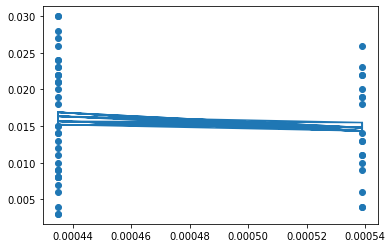

In [82]:
eqn = x*regression_model.coef_
eqn = eqn.sum(axis=1)+ regression_model.intercept_

import matplotlib.pyplot as plt
plt.scatter(x['P4'],y)
plt.plot(x['P4'],eqn)

Text(0.5, 0, 'P6')

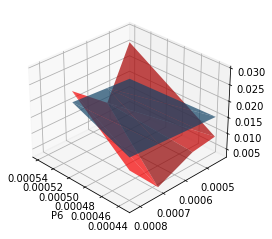

In [83]:
d3plot = plt.figure().gca(projection='3d')
d3plot.view_init(azim=135)
d3plot.plot_trisurf(x['P4'].values,x['P8'].values,eqn, alpha=0.7, antialiased=True)
d3plot.plot_trisurf(x['P4'].values,x['P8'].values,y, alpha=0.7, antialiased=True, color='red')
d3plot.set_xlabel("P4")
d3plot.set_xlabel("P6")

## Vii) Predictions

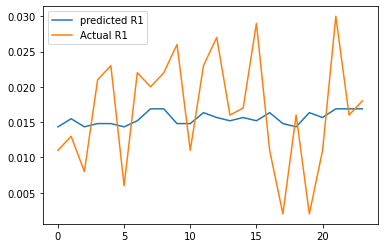

In [84]:
x_test = test[['P4','P8']]
y_test = test['R1']

n = np.arange(x_test.shape[0])

results = regression_model.predict(x_test)
plt.plot(n,results,label='predicted R1')

plt.plot(n,y_test,label='Actual R1')
plt.legend()

In [85]:
test.reset_index(inplace=True)
tabulation = pd.DataFrame()
tabulation['predicted R1'] = results 
tabulation['Actual R1'] = test['R1']
tabulation

,predicted R1,Actual R1
0,0.014335,0.011
1,0.015481,0.013
2,0.014335,0.008
3,0.014795,0.021
4,0.014795,0.023
5,0.014335,0.006
6,0.015195,0.022
7,0.016885,0.020
8,0.016885,0.022
9,0.014795,0.026


In [86]:
MAE = metrics.mean_absolute_error(y_test,results)
MSE = metrics.mean_squared_error(y_test,results)
RMSE = np.sqrt(MSE)
R_squared = estimate.rsquared
adjusted_R_squared = estimate.rsquared_adj

In [87]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[x.columns[0],x.columns[1]], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                                 MSE         MAE        RMSE    R-Squared    Adjusted R-Squared
----------------------  ---------------------------------  -----------  ----------  ----------  -----------  --------------------
['P4', 'P8']            Y = 0.017+ (-8.273)P4 + (4.424)P8  5.90526e-05  0.00636665  0.00768457    0.0121513             -0.025126
